# Final Project

- [Proposal](https://docs.google.com/document/d/1unp9emEueY_tyzT37XDVOiNJ4MBI39SgqNB95Cb8c3c/edit?usp=sharing)
- [Proposal Slides](https://docs.google.com/presentation/d/19HS_KwSPFKRd2zuvY_Q2bnih39fn7u_j0c6uu4J9InA/edit?usp=sharing)
- [Report]()
- [Final Presentation Slides]()
- [Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)
- [API](https://docs.fastf1.dev/core.html#api-reference)

## Setup

In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1
from scipy.stats import pearsonr
import numpy as np

## Exploring/Cleaning Data

In [257]:
# session = fastf1.get_session(2022, 'Australia', 'race')
# session.load()
# display(session.name)
# display(session.date)
# display(session.session_info)
# display(session.drivers)
# display(session.results)
# display(session.laps)
# display(session.total_laps)
# display(session.weather_data)
# display(session.car_data)
# display(session.pos_data)
# display(session.session_start_time)
# display(session.t0_date)

In [258]:
# races = pd.read_csv('races.csv')
# italianRaceID = races[races.name == 'Italian Grand Prix'][races.year == 2023].raceId.tolist()[0]
# italianRaceID
# results = pd.read_csv('results.csv')
# italianRace = results[results.raceId == italianRaceID]
# italianRace

In [259]:
session = fastf1.get_session(2023, 'Monza', 'race')
session.load()
lapsOriginal = session.laps

core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


In [260]:
results = session.results
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,2.0,NaT,NaT,NaT,0 days 01:13:41.143000,Finished,25.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:06.064000,Finished,18.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,3.0,3,1.0,NaT,NaT,NaT,0 days 00:00:11.193000,Finished,15.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:11.377000,Finished,12.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:23.028000,Finished,10.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:42.679000,Finished,8.0
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,7.0,7,6.0,NaT,NaT,NaT,0 days 00:00:45.106000,Finished,6.0
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,8.0,8,9.0,NaT,NaT,NaT,0 days 00:00:45.449000,Finished,4.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,9.0,9,10.0,NaT,NaT,NaT,0 days 00:00:46.294000,Finished,2.0
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,FIN,10.0,10,14.0,NaT,NaT,NaT,0 days 00:01:04.056000,Finished,1.0


In [261]:
laps = lapsOriginal.copy()

# Extract seconds from lap times
laps['LapSeconds'] = (laps['LapTime'].dt.seconds * 1000000 + laps['LapTime'].dt.microseconds) / 1000000
# Get an accumulated time for each lap
lapStartTime = laps.iloc[0].LapStartDate
laps['LapStartTimeSeconds'] = laps.LapStartDate - lapStartTime
# Add driver finishing position data
laps = pd.merge(laps, results[['Abbreviation', 'Position']], left_on='Driver', right_on='Abbreviation', how='left')
# Bin drivers into upper half of finishers and lower half
laps['UpperHalf'] = laps['Position_y'].apply(lambda x: True if x <= laps['Position_y'].max() / 2 else False)
# Calculate the number of pit stops for each driver
driverPitStops = laps.groupby('Driver')['PitInTime'].nunique().reset_index()
driverPitStops.columns = ['Driver', 'PitStops']
laps = pd.merge(laps, driverPitStops, on='Driver', how='left')
# Calculate mean and std of lap times for each driver
meanLapTimes = laps.groupby('Driver')['LapTime'].mean().reset_index()
meanLapTimes.columns = ['Driver', 'MeanLapTime']
stdLapTimes = laps.groupby('Driver')['LapTime'].std().reset_index()
stdLapTimes.columns = ['Driver', 'stdLapTime']
lapTimesStats = pd.merge(meanLapTimes, stdLapTimes, on='Driver', how='left')
laps = pd.merge(laps, lapTimesStats, on='Driver', how='left')

# Calculate pit stop durations
for i in range(laps.PitStops.max()):
    laps[f'Stop{i+1}Time'] = pd.NaT
laps['avgStopTime'] = pd.NaT
laps['LongestStopTime'] = pd.NaT
laps

for driver in laps.Driver.unique():
    driverStats = laps[laps.Driver == driver].reset_index()
    pitIn = driverStats[driverStats.PitInTime.notna()].index
    pitOut = driverStats[driverStats.PitOutTime.notna()].index
    pitTimes = []
    for i in range(len(pitOut)):
        pitTime = driverStats.iloc[pitOut[i]].PitOutTime - driverStats.iloc[pitIn[i]].PitInTime
        pitTimes.append(pitTime)
        laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
    if len(pitTimes) > 0:
        avgPitTime = pd.Timedelta(0)
        longestPitTime = pd.Timedelta(0)
        for time in pitTimes:
            avgPitTime += time
            if time > longestPitTime: 
                longestPitTime = time
        avgPitTime /= len(pitTimes)
        
        laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
        laps.loc[laps['Driver'] == driver, 'LongestStopTime'] = longestPitTime

display(laps)
display(laps.columns)
laps.describe()

C:\Users\nated\AppData\Local\Temp\ipykernel_34184\889652071.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_34184\889652071.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_34184\889652071.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please 

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Abbreviation,Position_y,UpperHalf,PitStops,MeanLapTime,stdLapTime,Stop1Time,Stop2Time,avgStopTime,LongestStopTime
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,VER,1.0,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,NaT,0 days 00:00:24.281000,0 days 00:00:24.281000
1,0 days 01:25:15.964000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,VER,1.0,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,NaT,0 days 00:00:24.281000,0 days 00:00:24.281000
2,0 days 01:26:41.666000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,VER,1.0,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,NaT,0 days 00:00:24.281000,0 days 00:00:24.281000
3,0 days 01:28:07.716000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,VER,1.0,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,NaT,0 days 00:00:24.281000,0 days 00:00:24.281000
4,0 days 01:29:33.892000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,VER,1.0,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,NaT,0 days 00:00:24.281000,0 days 00:00:24.281000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0 days 02:31:27.453000,PIA,81,0 days 00:01:26.614000,47.0,3.0,NaT,NaT,0 days 00:00:28.276000,0 days 00:00:29.795000,...,PIA,12.0,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,0 days 00:00:31.797000,0 days 00:00:27.968500,0 days 00:00:31.797000
963,0 days 02:32:53.520000,PIA,81,0 days 00:01:26.067000,48.0,3.0,NaT,NaT,0 days 00:00:28.089000,0 days 00:00:29.668000,...,PIA,12.0,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,0 days 00:00:31.797000,0 days 00:00:27.968500,0 days 00:00:31.797000
964,0 days 02:34:19.361000,PIA,81,0 days 00:01:25.841000,49.0,3.0,NaT,NaT,0 days 00:00:27.763000,0 days 00:00:29.762000,...,PIA,12.0,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,0 days 00:00:31.797000,0 days 00:00:27.968500,0 days 00:00:31.797000
965,0 days 02:35:44.954000,PIA,81,0 days 00:01:25.593000,50.0,3.0,NaT,NaT,0 days 00:00:28.181000,0 days 00:00:29.335000,...,PIA,12.0,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,0 days 00:00:31.797000,0 days 00:00:27.968500,0 days 00:00:31.797000


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds', 'LapStartTimeSeconds',
       'Abbreviation', 'Position_y', 'UpperHalf', 'PitStops', 'MeanLapTime',
       'stdLapTime', 'Stop1Time', 'Stop2Time', 'avgStopTime',
       'LongestStopTime'],
      dtype='object')

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,LapStartTime,LapStartDate,Position_x,LapSeconds,LapStartTimeSeconds,Position_y,PitStops,MeanLapTime,stdLapTime
count,967,948,967.000000,967.000000,25,26,929,948,948,928,...,967.000000,967,949,949.000000,948.000000,949,967.00000,967.000000,966,966
mean,0 days 02:00:29.264126163,0 days 00:01:27.766147679,25.974147,1.736298,0 days 01:55:36.463640,0 days 01:56:09.235000,0 days 00:00:28.839644779,0 days 00:00:30.047214135,0 days 00:00:28.819651898,0 days 01:59:34.552404094,...,14.389866,0 days 01:58:59.472268872,2023-09-03 13:59:18.187492096,9.858799,87.766148,0 days 00:35:55.416492096,9.85212,1.355739,0 days 00:01:27.765179963,0 days 00:00:03.497451298
min,0 days 01:23:49.013000,0 days 00:01:25.072000,1.000000,1.000000,0 days 01:37:34.372000,0 days 01:37:06.997000,0 days 00:00:27.731000,0 days 00:00:29.130000,0 days 00:00:27.838000,0 days 01:24:17.279000,...,1.000000,0 days 01:22:21.726000,2023-09-03 13:23:22.771000,1.000000,85.072000,0 days 00:00:00,1.00000,0.000000,0 days 00:01:26.689078431,0 days 00:00:02.770904323
25%,0 days 01:41:29.115500,0 days 00:01:26.463250,13.000000,1.000000,0 days 01:44:37.492000,0 days 01:45:37.737750,0 days 00:00:28.148000,0 days 00:00:29.761500,0 days 00:00:28.421000,0 days 01:41:43.683000,...,8.000000,0 days 01:40:00.253500,2023-09-03 13:40:52.444000,5.000000,86.463250,0 days 00:17:29.673000,5.00000,1.000000,0 days 00:01:27.042568627,0 days 00:00:02.870592843
50%,0 days 02:00:35.264000,0 days 00:01:27.044000,26.000000,2.000000,0 days 01:53:09.955000,0 days 01:52:54.541500,0 days 00:00:28.261000,0 days 00:00:30.005500,0 days 00:00:28.677500,0 days 01:59:40.655500,...,13.000000,0 days 01:59:08.862000,2023-09-03 13:59:04.567000064,10.000000,87.044000,0 days 00:35:41.796000,10.00000,1.000000,0 days 00:01:27.962500,0 days 00:00:03.069690434
75%,0 days 02:18:53.835000,0 days 00:01:27.518750,39.000000,2.000000,0 days 02:02:09.621000,0 days 02:06:32.563500,0 days 00:00:28.412000,0 days 00:00:30.226500,0 days 00:00:28.925250,0 days 02:17:22.906250,...,20.000000,0 days 02:17:28.112000,2023-09-03 14:17:29.972999936,15.000000,87.518750,0 days 00:54:07.202000,15.00000,2.000000,0 days 00:01:28.296720,0 days 00:00:04.292825736
max,0 days 02:40:15.309000,0 days 00:01:53.593000,52.000000,3.000000,0 days 02:22:52.576000,0 days 02:22:20.779000,0 days 00:00:56.224000,0 days 00:00:32.732000,0 days 00:00:47.837000,0 days 02:35:49.737000,...,40.000000,0 days 02:36:49.333000,2023-09-03 14:36:22.983000,20.000000,113.593000,0 days 01:13:00.212000,20.00000,2.000000,0 days 00:01:29.101974358,0 days 00:00:04.857096181
std,0 days 00:21:43.269455167,0 days 00:00:03.598416700,14.812575,0.626994,0 days 00:12:43.457600916,0 days 00:13:23.479666184,0 days 00:00:03.371164983,0 days 00:00:00.452883617,0 days 00:00:01.050402745,0 days 00:20:47.343383159,...,8.410288,0 days 00:21:40.153970404,NaN,5.432272,3.598417,0 days 00:21:15.196389533,5.42804,0.481141,0 days 00:00:00.662292322,0 days 00:00:00.718891193


In [262]:
laps[laps.LapTime == laps.LapTime.min()]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Abbreviation,Position_y,UpperHalf,PitStops,MeanLapTime,stdLapTime,Stop1Time,Stop2Time,avgStopTime,LongestStopTime
958,0 days 02:25:43.278000,PIA,81,0 days 00:01:25.072000,43.0,3.0,NaT,NaT,0 days 00:00:28.060000,0 days 00:00:29.174000,...,PIA,12.0,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,0 days 00:00:31.797000,0 days 00:00:27.968500,0 days 00:00:31.797000


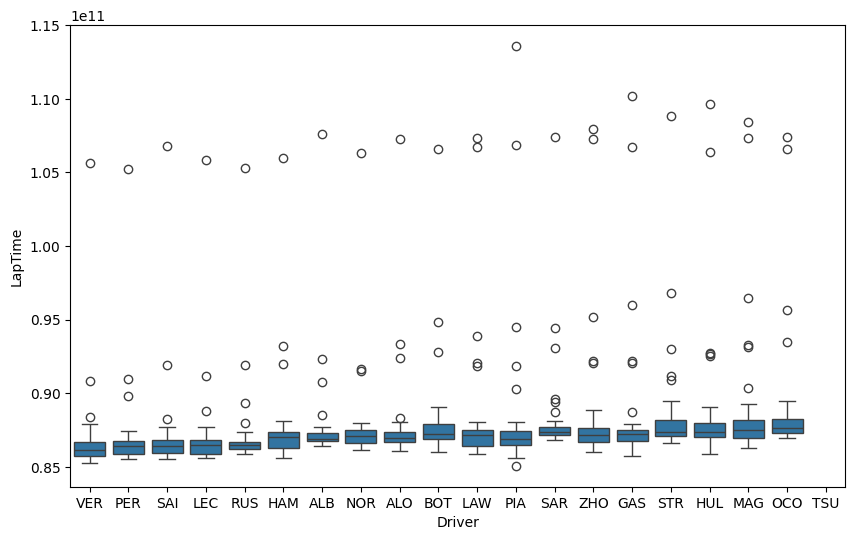

In [263]:
plt.figure(figsize=(10, 6))
sns.boxplot(laps.sort_values(by='Position_y'), x='Driver', y='LapTime')
plt.gca().invert_yaxis()  # Invert the y-axis

In [264]:
temp = laps.groupby('Driver').agg({'MeanLapTime': 'max', 'stdLapTime': 'max', 'Position_y': 'max'}).reset_index()
cleanTemp = temp.dropna(subset=['MeanLapTime', 'stdLapTime'])
# cleanTemp = cleanTemp[cleanTemp.Driver != 'OCO']

corr, p_value = pearsonr(cleanTemp['MeanLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

corr, p_value = pearsonr(cleanTemp['stdLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

0.9368094471654881

3.5589834443170797e-09

0.8619643009663165

2.0985408675279163e-06

-0.1295418407743323

6.330333534052088e-05

88.5858327647064

-0.03212457980659015

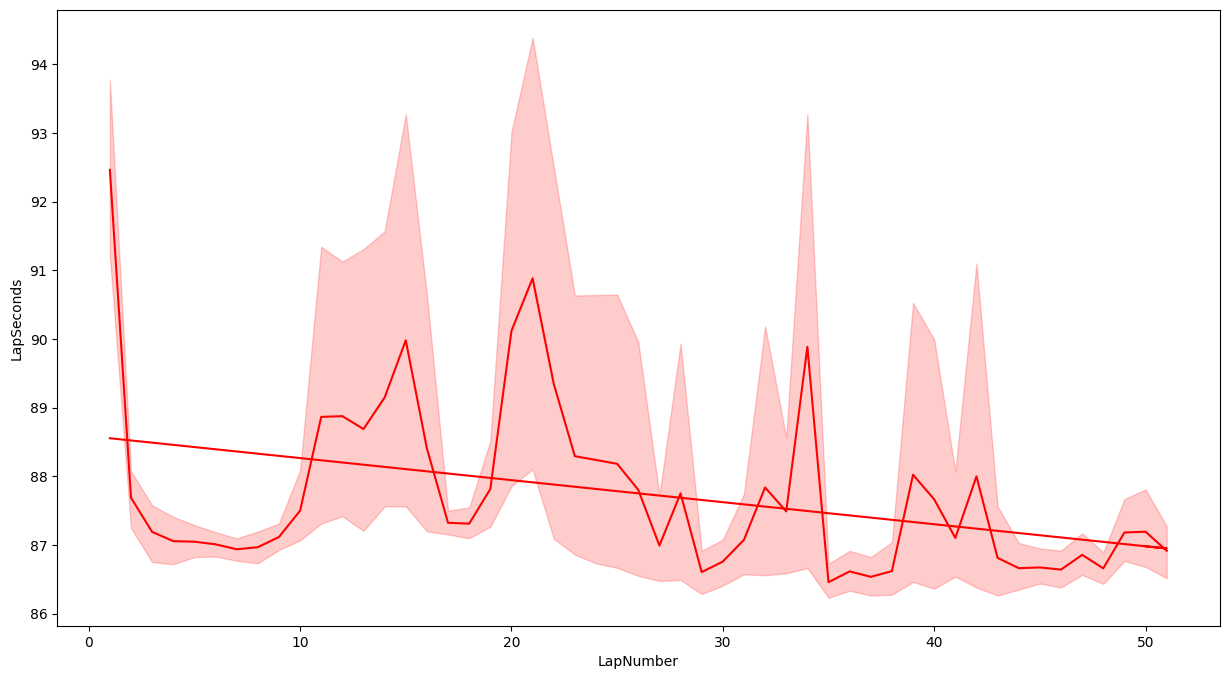

In [265]:
cleanLaps = laps.dropna(subset='LapSeconds')
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
# plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

-0.25168737446277634

8.39915790870742e-15

87.93103422248885

-0.027219987601986156

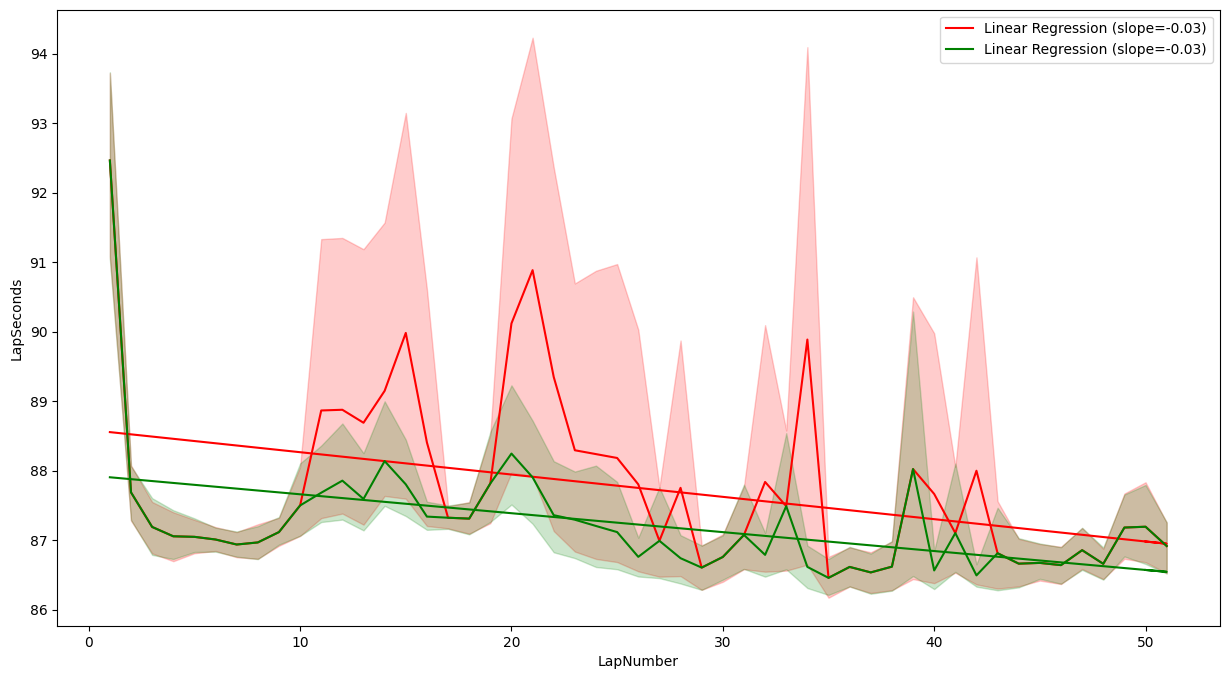

In [266]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
# plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

# cleanLaps = cleanLaps[cleanLaps.LapTime <= cleanLaps.MeanLapTime + 3 * cleanLaps.stdLapTime]
cleanLaps = cleanLaps[cleanLaps.PitOutTime.isna()]
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
# plt.figure(figsize=(15,8))
sns.lineplot(cleanLaps, x='LapNumber', y='LapSeconds', color='green')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='green', label=f'Linear Regression (slope={slope:.2f})')
plt.legend()
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

<Axes: xlabel='LapNumber', ylabel='LapSeconds'>

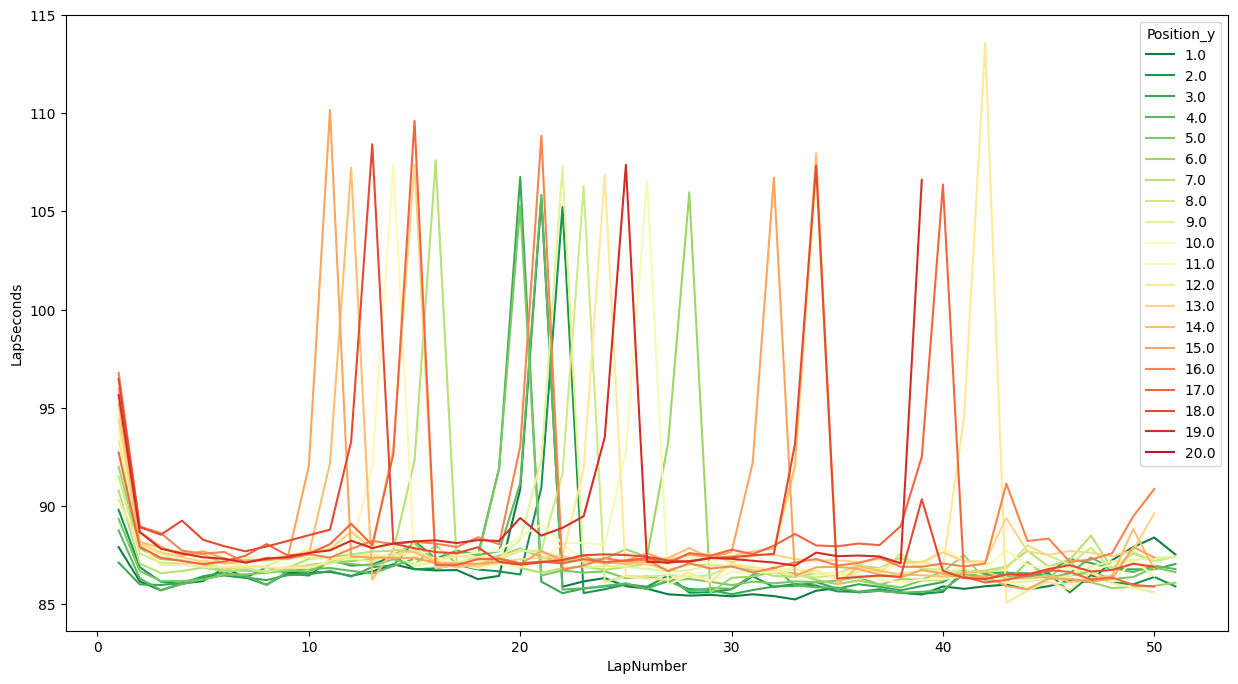

In [267]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
# plt.gca().invert_yaxis()  # Invert the y-axis

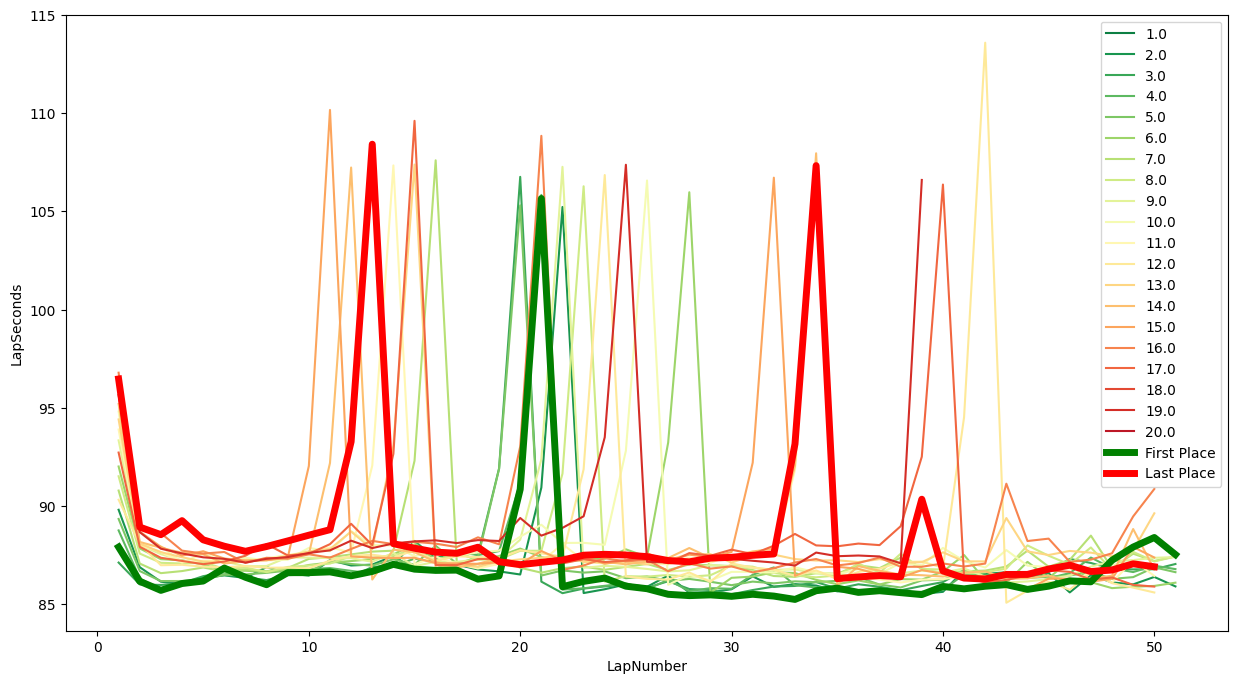

In [268]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Last Place')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

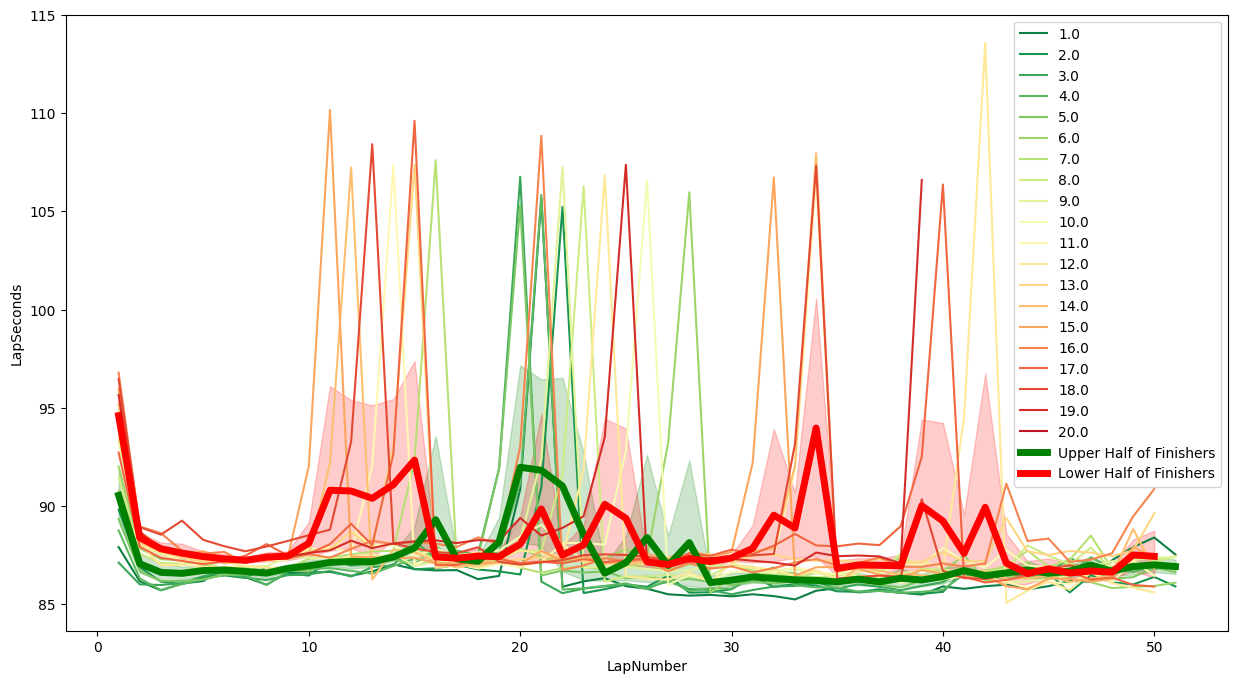

In [269]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

C:\Users\nated\AppData\Local\Temp\ipykernel_34184\214886422.py:2: UserWarning: The palette list has more values (20) than needed (19), which may not be intended.
  sns.lineplot(laps[laps.PitStops != 0], x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), size='PitStops', legend='full')


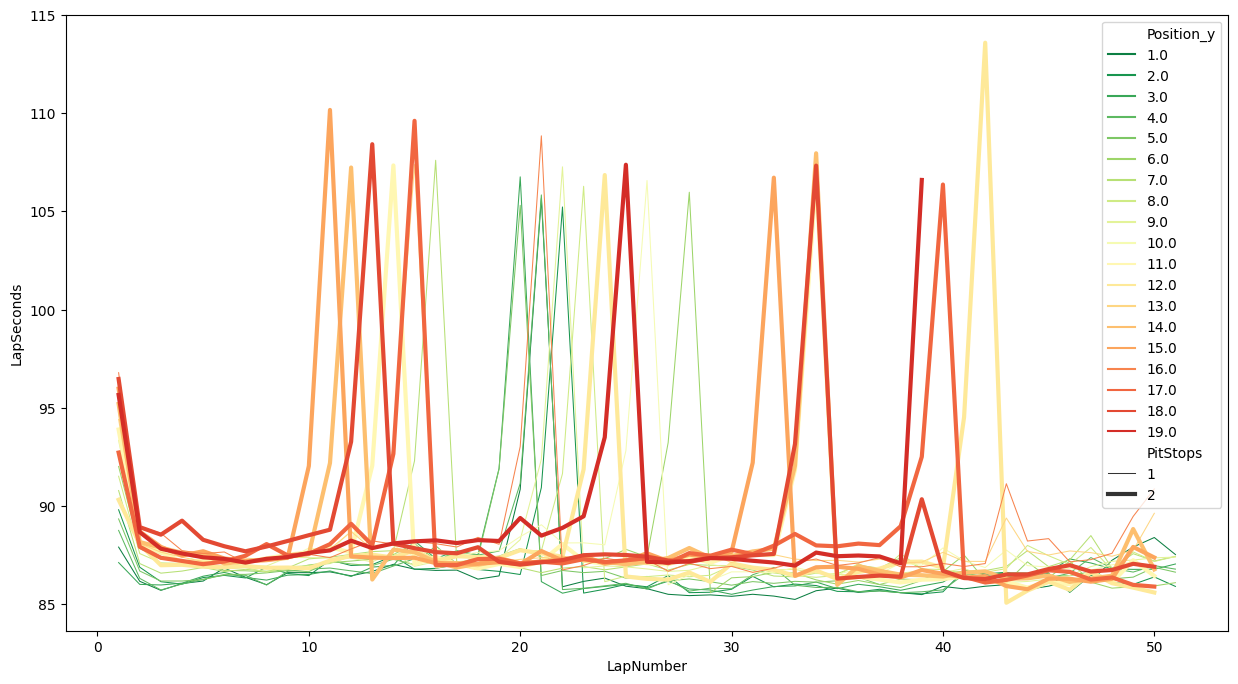

In [270]:
plt.figure(figsize=(15,8))
sns.lineplot(laps[laps.PitStops != 0], x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), size='PitStops', legend='full')
# sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
# sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

<Axes: xlabel='PitStops', ylabel='Driver'>

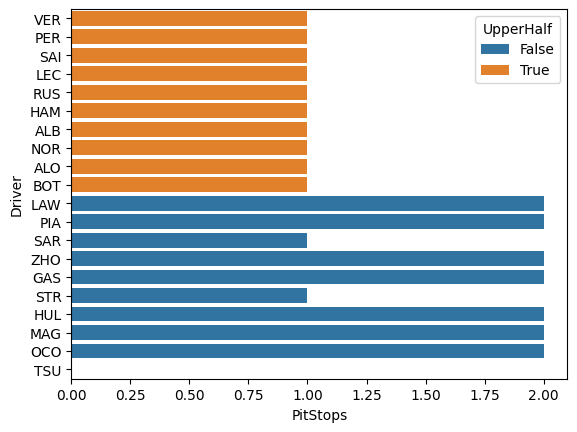

In [271]:
sns.barplot(laps.sort_values(by='Position_y'), x='PitStops', y='Driver', hue='UpperHalf')

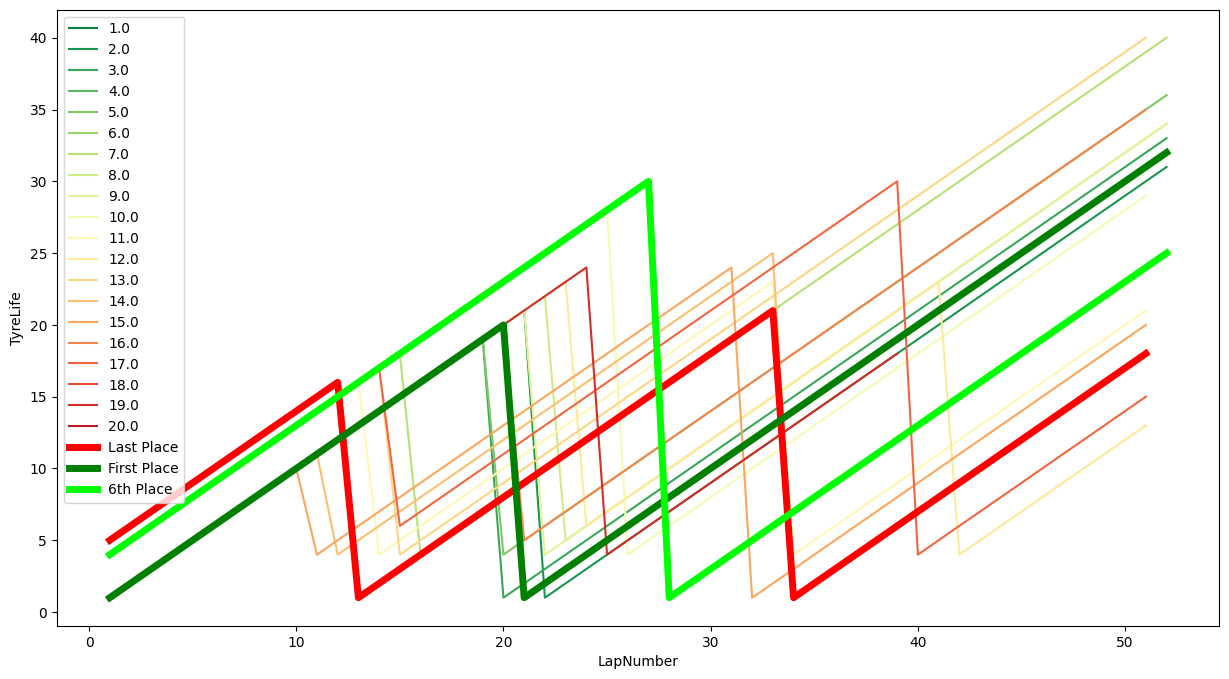

In [272]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='TyreLife', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='TyreLife', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='TyreLife', color='lime', linewidth=5, label='6th Place')
plt.show()
# sns.lineplot(laps, x='LapNumber', y='TyreLife')

<Axes: xlabel='LapNumber', ylabel='TyreLife'>

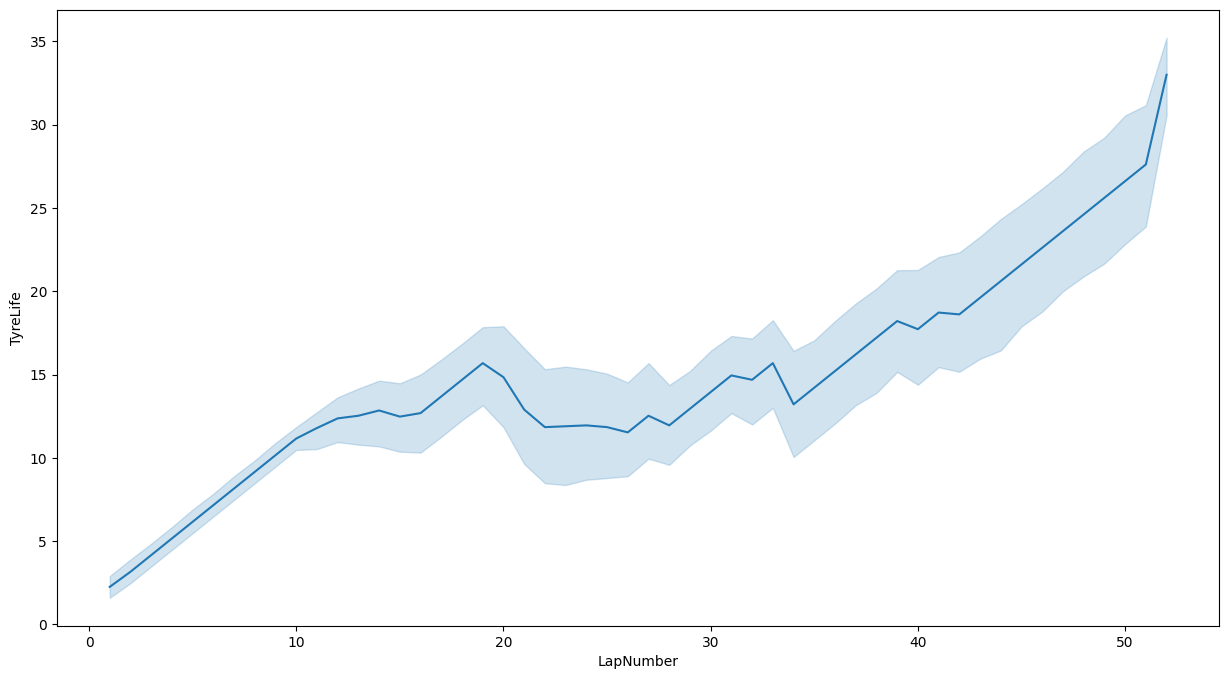

In [273]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife')

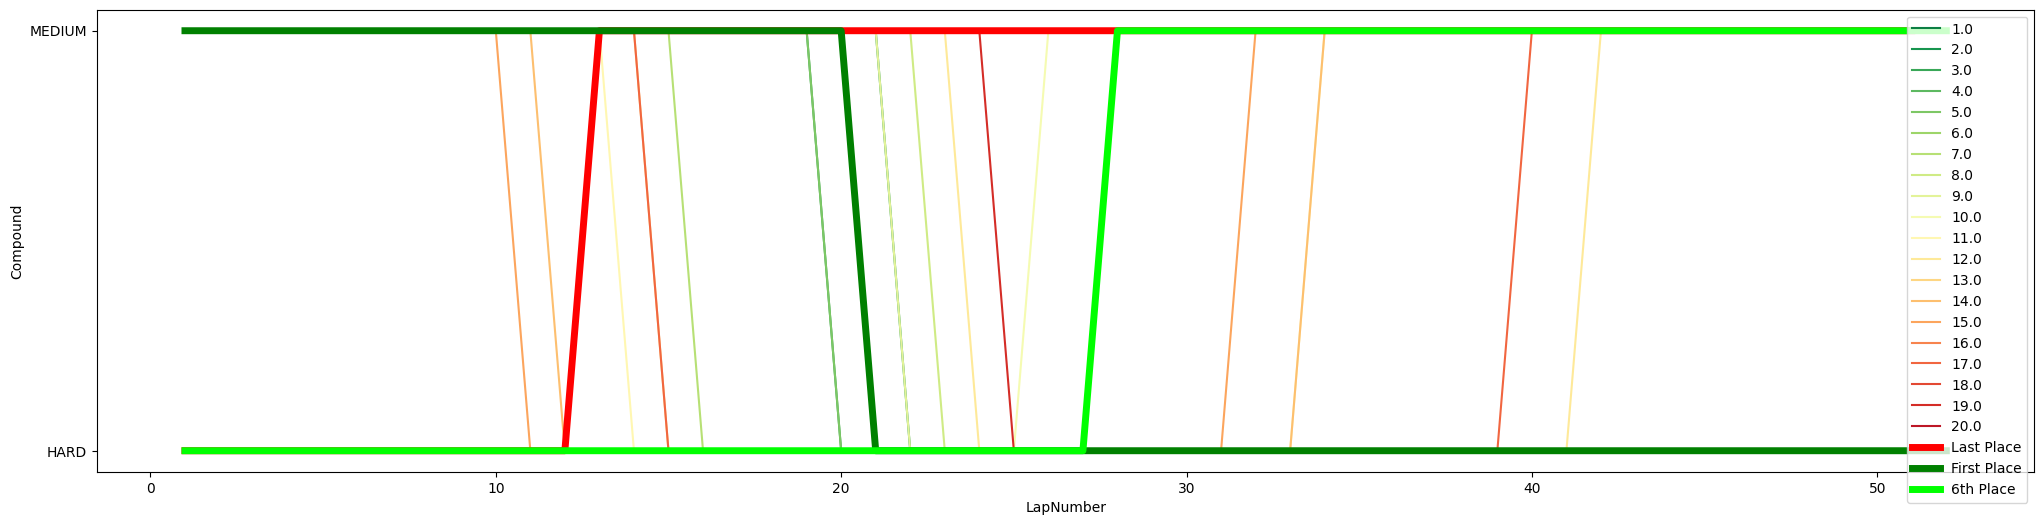

In [274]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Compound', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Compound', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Compound', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Compound', color='lime', linewidth=5, label='6th Place')
plt.show()

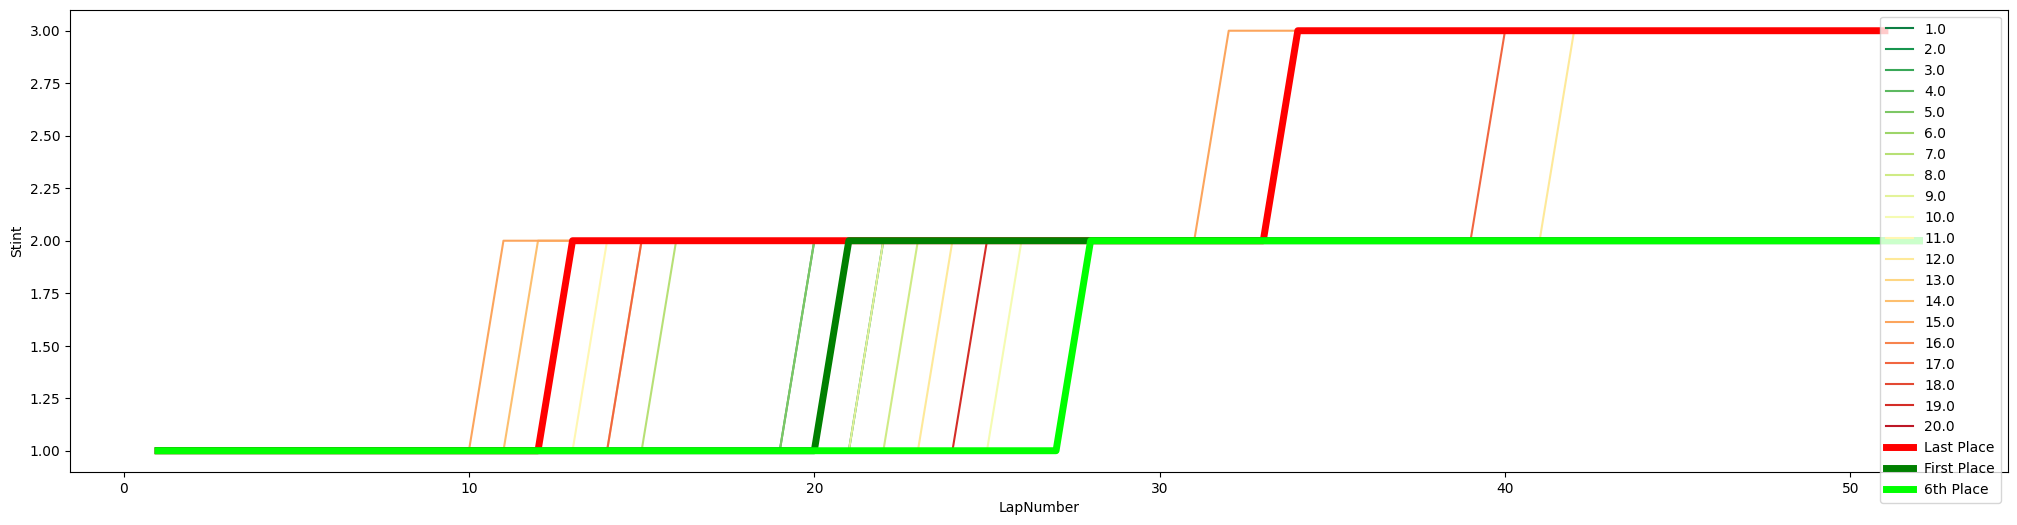

In [275]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Stint', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Stint', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Stint', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Stint', color='lime', linewidth=5, label='6th Place')
plt.show()

In [276]:
# laps[not laps.PitOutTime.isna() or not laps.PitOutTime.isna()]
# laps.loc[(laps['PitInTime'].notnull()) | (laps['PitOutTime'].notnull())]

In [277]:
drivers = laps.groupby('Driver').agg({'PitInTime': 'count', 'PitOutTime': 'count', 'LapTime': 'mean'}).reset_index()
drivers = drivers[drivers.PitInTime == drivers.PitOutTime]
drivers = drivers.dropna(subset='LapTime')
drivers.sort_values(by='LapTime')

,Driver,PitInTime,PitOutTime,LapTime
18,VER,1,1,0 days 00:01:26.689078431
11,PER,1,1,0 days 00:01:26.807980392
14,SAI,1,1,0 days 00:01:26.908549019
7,LEC,1,1,0 days 00:01:26.912156862
13,RUS,1,1,0 days 00:01:27.042568627
4,HAM,1,1,0 days 00:01:27.427882352
0,ALB,1,1,0 days 00:01:27.573509803
9,NOR,1,1,0 days 00:01:27.580235294
1,ALO,1,1,0 days 00:01:27.596803921
2,BOT,1,1,0 days 00:01:27.962500


## Circuits

In [278]:
circuits = pd.read_csv('circuits.csv')
circuits[circuits.circuitId == 14]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
13,14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...


## Races

In [279]:
races = pd.read_csv('races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


<Axes: xlabel='circuitId', ylabel='year'>

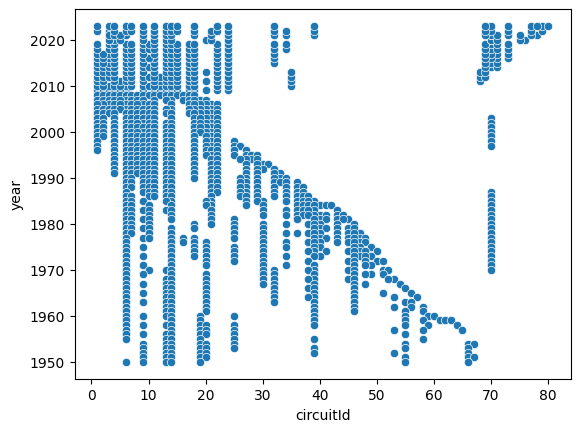

In [280]:
sns.scatterplot(x='circuitId', y='year', data=races)

In [281]:
raceTotals = races.groupby('circuitId').agg({'raceId': 'count', 'year': 'max'}).reset_index()
raceTotals = raceTotals[raceTotals.year == 2023].reset_index(drop=True).sort_values('raceId', ascending=False)
raceTotals

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
4,7,42,2023
10,18,40,2023
6,11,38,2023
16,70,37,2023
11,22,33,2023
14,39,33,2023


<Axes: xlabel='circuitId', ylabel='year'>

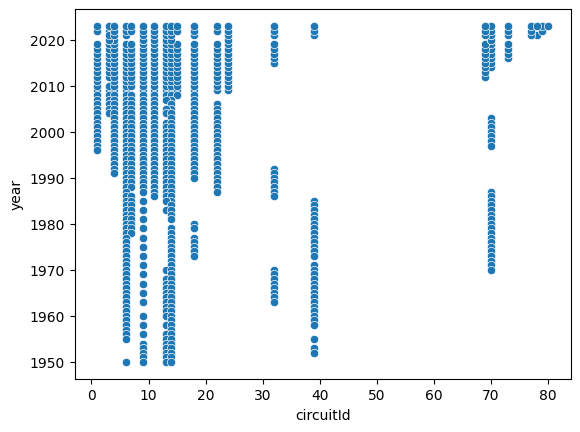

In [282]:
recentRaces = races[races.circuitId.isin(raceTotals.circuitId)].reset_index(drop=True)
sns.scatterplot(x='circuitId', y='year', data=recentRaces)

In [283]:
circuitsToKeep = recentRaces[recentRaces.year == 2009]
recentRaces = races[races.circuitId.isin(circuitsToKeep.circuitId)].reset_index(drop=True)
commonNames = recentRaces.groupby('circuitId')['name'].agg(lambda x: x.mode().iloc[0]).reset_index()
commonNames.columns = ['circuitId', 'common_name']
recentRaces = pd.merge(recentRaces, commonNames, on='circuitId', how='left')
display(recentRaces)
display(recentRaces.common_name.unique())
display(raceTotals[raceTotals.circuitId.isin(recentRaces.circuitId)])

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,common_name
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Australian Grand Prix
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain Grand Prix
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Spanish Grand Prix
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monaco Grand Prix
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,British Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,2023-09-01,15:00:00,2023-09-02,10:30:00,2023-09-02,14:00:00,\N,\N,Italian Grand Prix
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,2023-09-15,13:00:00,2023-09-16,09:30:00,2023-09-16,13:00:00,\N,\N,Singapore Grand Prix
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,2023-09-22,06:00:00,2023-09-23,02:30:00,2023-09-23,06:00:00,\N,\N,Japanese Grand Prix
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,Brazilian Grand Prix


array(['Australian Grand Prix', 'Bahrain Grand Prix',
       'Spanish Grand Prix', 'Monaco Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix',
       'Brazilian Grand Prix', 'Abu Dhabi Grand Prix'], dtype=object)

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
10,18,40,2023
6,11,38,2023
11,22,33,2023
2,4,33,2023
0,1,26,2023
1,3,20,2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australian Grand Prix'),
  Text(1, 0, 'Bahrain Grand Prix'),
  Text(2, 0, 'Spanish Grand Prix'),
  Text(3, 0, 'Monaco Grand Prix'),
  Text(4, 0, 'British Grand Prix'),
  Text(5, 0, 'Hungarian Grand Prix'),
  Text(6, 0, 'Belgian Grand Prix'),
  Text(7, 0, 'Italian Grand Prix'),
  Text(8, 0, 'Singapore Grand Prix'),
  Text(9, 0, 'Japanese Grand Prix'),
  Text(10, 0, 'Brazilian Grand Prix'),
  Text(11, 0, 'Abu Dhabi Grand Prix')])

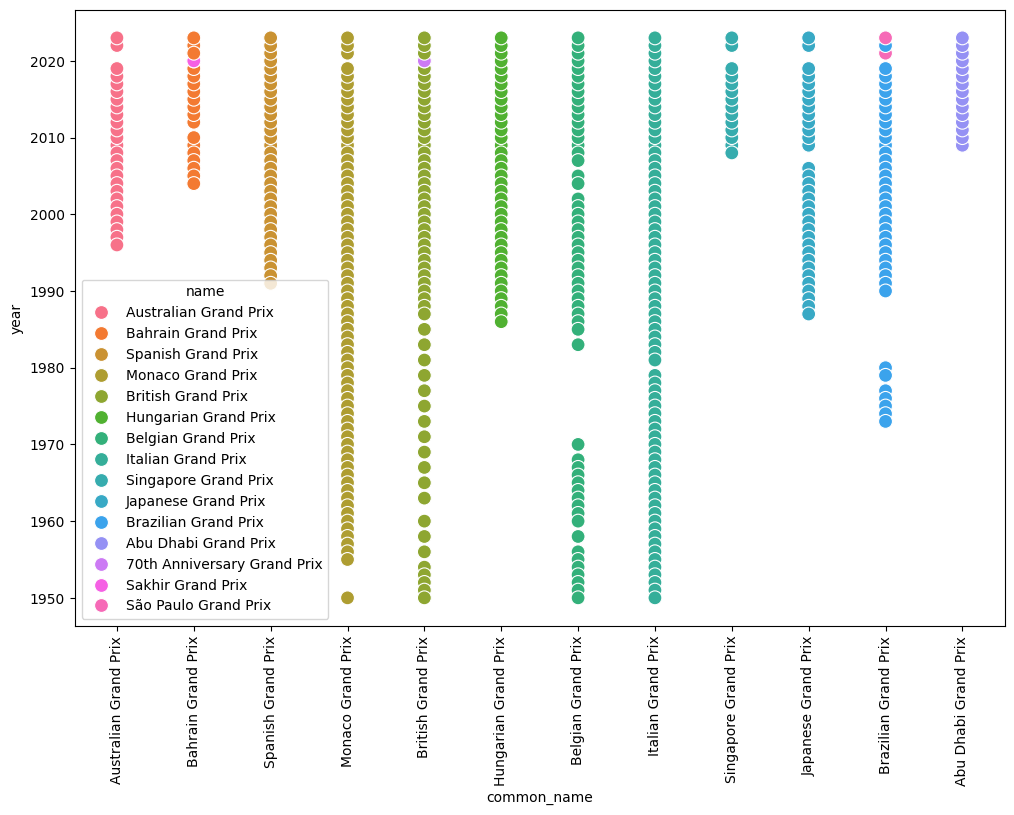

In [284]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='common_name', y='year', data=recentRaces, hue='name', s=100)
plt.xticks(rotation=90)

In [285]:
recentRaces = pd.merge(recentRaces, circuits, on='circuitId', how='left')
recentRaces = recentRaces.rename(columns={'name_x': 'race_name', 'url_x': 'race_url', 'common_name': 'common_race_name', 'name_y': 'circuit_name', 'url_y': 'circuit_url'})
recentRaces

,raceId,year,round,circuitId,race_name,date,time,race_url,fp1_date,fp1_time,...,sprint_time,common_race_name,circuitRef,circuit_name,location,country,lat,lng,alt,circuit_url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,...,\N,Bahrain Grand Prix,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,...,\N,Spanish Grand Prix,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,...,\N,Monaco Grand Prix,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,...,\N,British Grand Prix,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,...,\N,Italian Grand Prix,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,...,\N,Singapore Grand Prix,marina_bay,Marina Bay Street Circuit,Marina Bay,Singapore,1.2914,103.86400,18,http://en.wikipedia.org/wiki/Marina_Bay_Street...
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,...,\N,Japanese Grand Prix,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45,http://en.wikipedia.org/wiki/Suzuka_Circuit
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,...,18:30:00,Brazilian Grand Prix,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...


## Constructor Results

In [286]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_results = pd.merge(constructor_results, races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']], how='left')
constructor_results

,constructorResultsId,raceId,constructorId,points,status,year,round,circuitId,name,date,time
0,1,18,1,14.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,18,2,8.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,18,3,9.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,18,4,5.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,18,5,2.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...
12285,16785,1110,214,10.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12286,16786,1110,213,1.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12287,16787,1110,51,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12288,16788,1110,3,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00


## Constructor Standings

In [287]:
constructor_standings = pd.read_csv('constructor_standings.csv')
display(constructor_standings)
constructor_standings.groupby('raceId').agg({'constructorId': 'count', 'wins': 'sum'})
# constructor_standings[constructor_standings.constructorId == 1].wins.tolist()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


,constructorId,wins
raceId,,
1,9,1
2,10,2
3,10,3
4,10,4
5,10,5
...,...,...
1106,10,8
1107,10,9
1108,10,10


In [288]:
circuit_id = [1,3,4,6,9,11,13,14,15,18,22,24]

In [289]:
australian_circuit = races.loc[races['circuitId'] == 1]
australian_circuit = australian_circuit[australian_circuit.year >= 2008]
australian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

lap_times = pd.read_csv('lap_times.csv')

merged_australian_circuit =  pd.merge(australian_circuit, lap_times, on='raceId')
display(merged_australian_circuit)


,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,1,1,13,1:49.088,109088
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,1,2,12,1:33.740,93740
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,1,3,11,1:31.600,91600
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,1,4,10,1:31.067,91067
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,1,5,10,1:32.129,92129
...,...,...,...,...,...,...,...,...,...,...,...,...
13537,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,822,54,14,6:35.214,395214
13538,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,822,55,14,10:58.233,658233
13539,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,822,56,14,3:09.210,189210
13540,1100,2023,3,1,Australian Grand Prix,2023-04-02,05:00:00,822,57,12,33:24.625,2004625


In [290]:
bahrain_circuit = races.loc[races['circuitId'] == 3]
bahrain_circuit = bahrain_circuit[bahrain_circuit.year >= 2008]
bahrain_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merged_bahrain_circuit =  pd.merge(bahrain_circuit, lap_times, on='raceId')
display(merged_bahrain_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,1,1,3,1:40.684,100684
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,1,2,4,1:36.906,96906
2,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,1,3,4,1:36.250,96250
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,1,4,4,1:35.720,95720
4,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,1,5,4,1:35.727,95727
...,...,...,...,...,...,...,...,...,...,...,...,...
17508,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,856,52,15,1:40.330,100330
17509,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,856,53,15,1:39.150,99150
17510,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,856,54,15,1:38.885,98885
17511,1098,2023,1,3,Bahrain Grand Prix,2023-03-05,15:00:00,856,55,14,1:39.239,99239


In [291]:
spanish_circuit = races.loc[races['circuitId'] == 4]
spanish_circuit = spanish_circuit[spanish_circuit.year >= 2008]
spanish_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_spanish_circuit =  pd.merge(spanish_circuit, lap_times, on='raceId')
display(merged_spanish_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,1,1,15,1:59.979,119979
1,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,1,2,15,2:24.326,144326
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,1,3,14,2:18.709,138709
3,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,1,4,14,2:17.043,137043
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,1,5,14,2:13.622,133622
...,...,...,...,...,...,...,...,...,...,...,...,...
19729,1105,2023,7,4,Spanish Grand Prix,2023-06-04,13:00:00,844,62,12,1:19.035,79035
19730,1105,2023,7,4,Spanish Grand Prix,2023-06-04,13:00:00,844,63,12,1:19.096,79096
19731,1105,2023,7,4,Spanish Grand Prix,2023-06-04,13:00:00,844,64,12,1:19.502,79502
19732,1105,2023,7,4,Spanish Grand Prix,2023-06-04,13:00:00,844,65,12,1:18.922,78922


In [292]:
monaco_circuit = races.loc[races['circuitId'] == 6]
monaco_circuit = monaco_circuit[monaco_circuit.year >= 2008]
monaco_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_monaco_circuit =  pd.merge(monaco_circuit, lap_times, on='raceId')
display(merged_monaco_circuit)


,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,1,1,18,1:39.980,99980
1,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,1,2,17,1:25.188,85188
2,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,1,3,17,1:18.851,78851
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,1,4,17,1:18.896,78896
4,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,1,5,17,1:19.798,79798
...,...,...,...,...,...,...,...,...,...,...,...,...
21074,1104,2023,6,6,Monaco Grand Prix,2023-05-28,13:00:00,807,72,16,1:32.994,92994
21075,1104,2023,6,6,Monaco Grand Prix,2023-05-28,13:00:00,807,73,16,1:33.111,93111
21076,1104,2023,6,6,Monaco Grand Prix,2023-05-28,13:00:00,807,74,16,1:34.924,94924
21077,1104,2023,6,6,Monaco Grand Prix,2023-05-28,13:00:00,807,75,16,1:34.146,94146


In [293]:
british_circuit = races.loc[races['circuitId'] == 9]
british_circuit = british_circuit[british_circuit.year >= 2008]
british_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_british_circuit =  pd.merge(british_circuit, lap_times, on='raceId')
display(merged_british_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,1,1,15,1:37.325,97325
1,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,1,2,14,1:27.247,87247
2,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,1,3,15,1:27.646,87646
3,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,1,4,15,1:24.854,84854
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,1,5,15,1:25.228,85228
...,...,...,...,...,...,...,...,...,...,...,...,...
16453,1108,2023,10,9,British Grand Prix,2023-07-09,14:00:00,825,27,16,1:33.935,93935
16454,1108,2023,10,9,British Grand Prix,2023-07-09,14:00:00,825,28,15,1:33.760,93760
16455,1108,2023,10,9,British Grand Prix,2023-07-09,14:00:00,825,29,15,1:33.356,93356
16456,1108,2023,10,9,British Grand Prix,2023-07-09,14:00:00,825,30,14,1:33.466,93466


In [294]:
hungarian_circuit = races.loc[races['circuitId'] == 11]
hungarian_circuit = hungarian_circuit[hungarian_circuit.year >= 2008]
hungarian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merged_hungarian_circuit =  pd.merge(hungarian_circuit, lap_times, on='raceId')
display(merged_hungarian_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,1,1,3,1:32.008,92008
1,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,1,2,3,1:25.463,85463
2,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,1,3,3,1:24.894,84894
3,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,1,4,3,1:24.076,84076
4,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,1,5,2,1:23.554,83554
...,...,...,...,...,...,...,...,...,...,...,...,...
21201,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,817,68,13,1:24.059,84059
21202,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,817,69,13,1:27.273,87273
21203,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,839,1,19,1:46.965,106965
21204,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,839,2,19,1:41.181,101181


In [295]:
belgian_circuit = races.loc[races['circuitId'] == 13]
belgian_circuit = belgian_circuit[belgian_circuit.year >= 2008]
belgian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_belgian_circuit =  pd.merge(belgian_circuit, lap_times, on='raceId')
display(merged_belgian_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,12,2009,12,13,Belgian Grand Prix,2009-08-30,12:00:00,5,1,11,2:21.004,141004
1,12,2009,12,13,Belgian Grand Prix,2009-08-30,12:00:00,5,2,10,2:54.399,174399
2,12,2009,12,13,Belgian Grand Prix,2009-08-30,12:00:00,5,3,10,2:55.894,175894
3,12,2009,12,13,Belgian Grand Prix,2009-08-30,12:00:00,5,4,10,2:50.152,170152
4,12,2009,12,13,Belgian Grand Prix,2009-08-30,12:00:00,5,5,10,1:54.325,114325
...,...,...,...,...,...,...,...,...,...,...,...,...
11985,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,817,40,17,1:54.361,114361
11986,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,817,41,17,1:53.367,113367
11987,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,817,42,16,1:55.247,115247
11988,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,817,43,16,1:52.115,112115


In [296]:
italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2008]
italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_italian_circuit =  pd.merge(italian_circuit, lap_times, on='raceId')
display(merged_italian_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,1,1,1,1:29.899,89899
1,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,1,2,1,1:26.528,86528
2,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,1,3,1,1:26.440,86440
3,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,1,4,1,1:25.714,85714
4,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,1,5,1,1:25.815,85815
...,...,...,...,...,...,...,...,...,...,...,...,...
14895,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,822,48,13,1:58.624,118624
14896,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,822,49,13,1:44.343,104343
14897,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,822,50,13,2:11.878,131878
14898,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,822,51,13,2:23.805,143805


In [297]:
singapore_circuit = races.loc[races['circuitId'] == 15]
singapore_circuit = singapore_circuit[singapore_circuit.year >= 2008]
singapore_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_singapore_circuit =  pd.merge(singapore_circuit, lap_times, on='raceId')
display(merged_singapore_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,14,2009,14,15,Singapore Grand Prix,2009-09-27,12:00:00,1,1,1,1:54.996,114996
1,14,2009,14,15,Singapore Grand Prix,2009-09-27,12:00:00,1,2,1,1:50.935,110935
2,14,2009,14,15,Singapore Grand Prix,2009-09-27,12:00:00,1,3,1,1:49.938,109938
3,14,2009,14,15,Singapore Grand Prix,2009-09-27,12:00:00,1,4,1,1:49.172,109172
4,14,2009,14,15,Singapore Grand Prix,2009-09-27,12:00:00,1,5,1,1:49.674,109674
...,...,...,...,...,...,...,...,...,...,...,...,...
14656,1091,2022,17,15,Singapore Grand Prix,2022-10-02,12:00:00,848,21,16,2:20.921,140921
14657,1091,2022,17,15,Singapore Grand Prix,2022-10-02,12:00:00,848,22,16,2:29.359,149359
14658,1091,2022,17,15,Singapore Grand Prix,2022-10-02,12:00:00,848,23,16,2:03.038,123038
14659,1091,2022,17,15,Singapore Grand Prix,2022-10-02,12:00:00,848,24,16,2:02.121,122121


In [298]:
sao_paulo_circuit = races.loc[races['circuitId'] == 18]
sao_paulo_circuit = sao_paulo_circuit[sao_paulo_circuit.year >= 2008]
sao_paulo_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_sao_paulo_circuit =  pd.merge(sao_paulo_circuit, lap_times, on='raceId')
display(merged_sao_paulo_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,1,1,12,1:46.078,106078
1,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,1,2,15,2:03.212,123212
2,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,1,3,14,1:58.326,118326
3,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,1,4,14,2:01.755,121755
4,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,1,5,14,1:44.807,104807
...,...,...,...,...,...,...,...,...,...,...,...,...
18700,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,852,66,17,1:15.983,75983
18701,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,852,67,17,1:16.339,76339
18702,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,852,68,17,1:16.097,76097
18703,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,852,69,17,1:16.406,76406


In [299]:
japanese_circuit = races.loc[races['circuitId'] == 22]
japanese_circuit = japanese_circuit[japanese_circuit.year >= 2008]
japanese_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_japanese_circuit =  pd.merge(japanese_circuit, lap_times, on='raceId')
display(merged_japanese_circuit)

,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,15,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,1,1,2,1:37.507,97507
1,15,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,1,2,2,1:35.463,95463
2,15,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,1,3,2,1:34.216,94216
3,15,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,1,4,2,1:33.721,93721
4,15,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,1,5,2,1:33.715,93715
...,...,...,...,...,...,...,...,...,...,...,...,...
11648,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,842,24,17,1:48.888,108888
11649,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,842,25,17,1:48.189,108189
11650,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,842,26,17,1:49.689,109689
11651,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,842,27,17,1:50.958,110958


In [300]:
abu_dhabi_circuit = races.loc[races['circuitId'] == 24]
abu_dhabi_circuit = abu_dhabi_circuit[abu_dhabi_circuit.year >= 2008]
abu_dhabi_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_abu_dhabi_circuit =  pd.merge(abu_dhabi_circuit, lap_times, on='raceId')
display(merged_abu_dhabi_circuit)


,raceId,year,round,circuitId,name,date,time_x,driverId,lap,position,time_y,milliseconds
0,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00,1,1,1,1:49.107,109107
1,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00,1,2,1,1:43.788,103788
2,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00,1,3,1,1:42.715,102715
3,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00,1,4,1,1:42.136,102136
4,17,2009,17,24,Abu Dhabi Grand Prix,2009-11-01,11:00:00,1,5,1,1:41.620,101620
...,...,...,...,...,...,...,...,...,...,...,...,...
14862,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,822,53,16,1:32.998,92998
14863,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,822,54,16,1:32.995,92995
14864,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,822,55,16,1:31.236,91236
14865,1096,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,822,56,15,1:30.566,90566
